In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from pathlib import Path

# Set basic style without using style.use
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True
sns.set_theme()  # This is the correct way to set seaborn style
%matplotlib inline

In [20]:
# Define paths
base_path = Path('../datasets/raw_drift_dataset')
hdfs_path = base_path / 'HDFS' / 'hdfs.log'
apache_path = base_path / 'Apache' / 'Apache.log'
health_path = base_path / 'HealthApp' / 'HealthApp.log'
bgl_path = base_path / 'BGL' / 'BGL.log'
hpc_path = base_path / 'HPC' / 'HPC.log'
linux_path = base_path / 'Linux' / 'Linux.log'
mac_path = base_path / 'Mac' / 'Mac.log'

def read_logs(file_path):
    """Read log files and return non-empty lines."""
    # Try different encodings
    encodings = ['utf-8', 'latin1', 'iso-8859-1']
    
    for encoding in encodings:
        try:
            with open(file_path, 'r', encoding=encoding) as f:
                return [line.strip() for line in f.readlines() if line.strip()]
        except UnicodeDecodeError:
            continue
    
    # If all encodings fail, use latin1 with error replacement
    with open(file_path, 'r', encoding='latin1', errors='replace') as f:
        return [line.strip() for line in f.readlines() if line.strip()]

# Read logs
print("Reading log files...")
hdfs_logs = read_logs(hdfs_path)
apache_logs = read_logs(apache_path)
health_logs = read_logs(health_path)
bgl_logs = read_logs(bgl_path)
hpc_logs = read_logs(hpc_path)
linux_logs = read_logs(linux_path)
mac_logs = read_logs(mac_path)

print(f"HDFS Logs: {len(hdfs_logs)} entries")
print(f"Apache Logs: {len(apache_logs)} entries")
print(f"HealthApp Logs: {len(health_logs)} entries")
print(f"BGL Logs: {len(bgl_logs)} entries")
print(f"HPC Logs: {len(hpc_logs)} entries")
print(f"Linux Logs: {len(linux_logs)} entries")
print(f"Mac Logs: {len(mac_logs)} entries")

# Show samples
print("\nSample log entries:")
for name, logs in [
    ("HDFS", hdfs_logs), 
    ("Apache", apache_logs), 
    ("HealthApp", health_logs),
    ("BGL", bgl_logs),
    ("HPC", hpc_logs),
    ("Linux", linux_logs),
    ("Mac", mac_logs)
]:
    print(f"\n{name} samples:")
    for log in logs[:3]:
        print(f"- {log}")

Reading log files...
HDFS Logs: 2000 entries
Apache Logs: 56482 entries
HealthApp Logs: 253395 entries
BGL Logs: 4747963 entries
HPC Logs: 433490 entries
Linux Logs: 25567 entries
Mac Logs: 116735 entries

Sample log entries:

HDFS samples:
- 081109 203615 148 INFO dfs.DataNode$PacketResponder: PacketResponder 1 for block blk_38865049064139660 terminating
- 081109 203807 222 INFO dfs.DataNode$PacketResponder: PacketResponder 0 for block blk_-6952295868487656571 terminating
- 081109 204005 35 INFO dfs.FSNamesystem: BLOCK* NameSystem.addStoredBlock: blockMap updated: 10.251.73.220:50010 is added to blk_7128370237687728475 size 67108864

Apache samples:
- [Thu Jun 09 06:07:04 2005] [notice] LDAP: Built with OpenLDAP LDAP SDK
- [Thu Jun 09 06:07:04 2005] [notice] LDAP: SSL support unavailable
- [Thu Jun 09 06:07:04 2005] [notice] suEXEC mechanism enabled (wrapper: /usr/sbin/suexec)

HealthApp samples:
- 20171223-22:15:29:606|Step_LSC|30002312|onStandStepChanged 3579
- 20171223-22:15:29:615

In [4]:
def parse_hdfs_timestamp(log):
    """Parse timestamp from HDFS log format."""
    parts = log.split(' ', 3)
    if len(parts) >= 2:
        try:
            date_str = parts[0]
            time_str = parts[1]
            year = int('20' + date_str[:2])
            month = int(date_str[2:4])
            day = int(date_str[4:])
            hour = int(time_str[:2])
            minute = int(time_str[2:4])
            second = int(time_str[4:])
            return datetime(year, month, day, hour, minute, second)
        except:
            return None
    return None

def parse_apache_timestamp(log):
    """Parse timestamp from Apache log format."""
    match = re.search(r'\[(.*?)\]', log)
    if match:
        try:
            return datetime.strptime(match.group(1), "%a %b %d %H:%M:%S %Y")
        except:
            return None
    return None

def parse_health_timestamp(log):
    """Parse timestamp from HealthApp log format."""
    parts = log.split('|')
    if parts:
        try:
            timestamp_str = parts[0].split(':')[0] + ':' + parts[0].split(':')[1] + ':' + parts[0].split(':')[2]
            return datetime.strptime(timestamp_str, "%Y%m%d-%H:%M:%S")
        except:
            return None
    return None


HDFS Log Structure Analysis:
Length statistics:
- Min: 93
- Max: 2520
- Mean: 141.92
- Std: 76.97


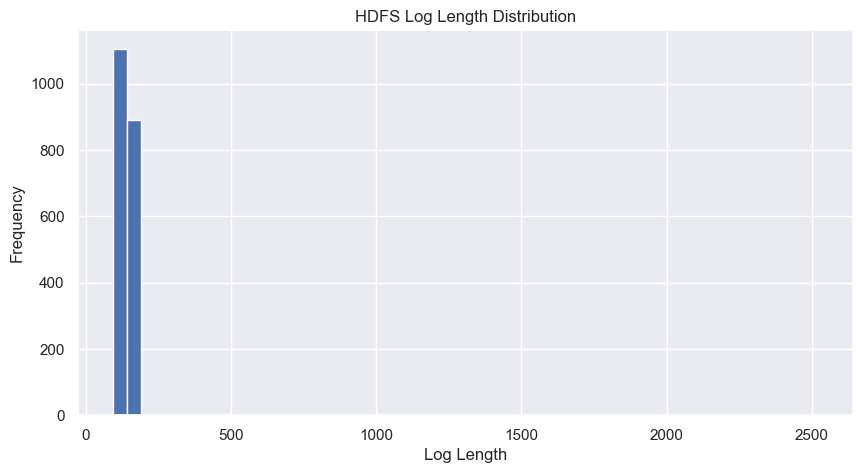


Apache Log Structure Analysis:
Length statistics:
- Min: 34
- Max: 187
- Mean: 89.93
- Std: 21.66


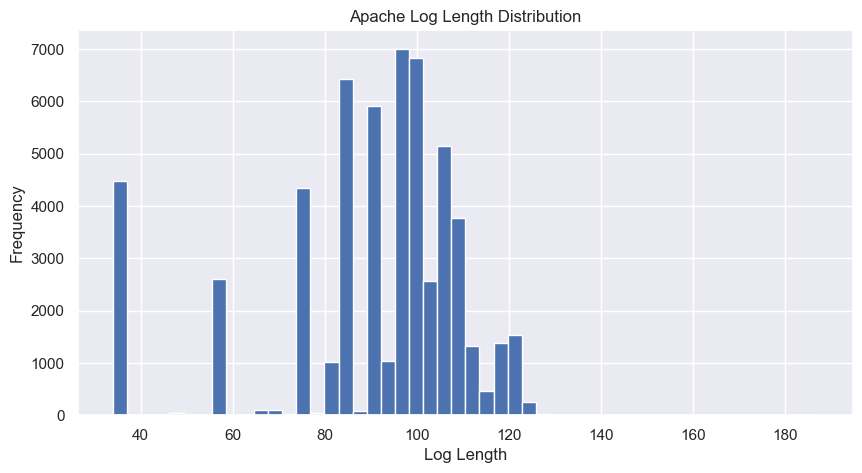


HealthApp Log Structure Analysis:
Length statistics:
- Min: 48
- Max: 294
- Mean: 90.86
- Std: 22.49


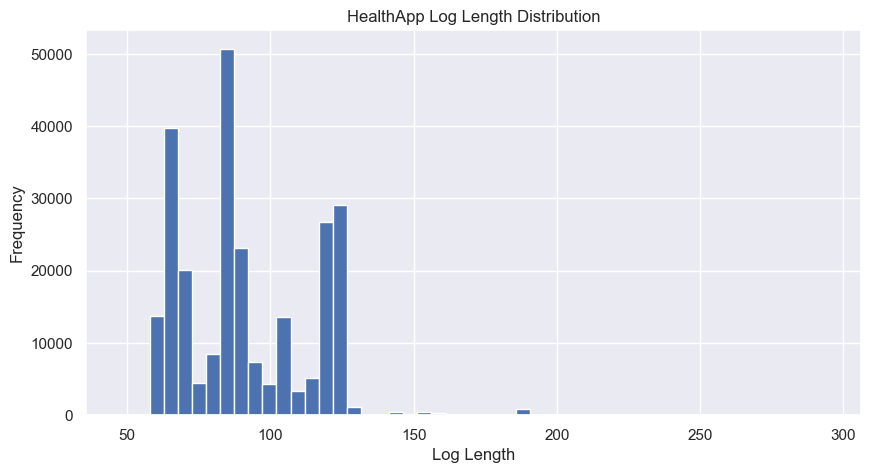

In [5]:
def analyze_log_structure(logs, name):
    """Analyze basic structure of logs."""
    print(f"\n{name} Log Structure Analysis:")
    
    # Length statistics
    lengths = [len(log) for log in logs]
    print(f"Length statistics:")
    print(f"- Min: {min(lengths)}")
    print(f"- Max: {max(lengths)}")
    print(f"- Mean: {np.mean(lengths):.2f}")
    print(f"- Std: {np.std(lengths):.2f}")
    
    # Plot length distribution
    plt.figure(figsize=(10, 5))
    plt.hist(lengths, bins=50)
    plt.title(f"{name} Log Length Distribution")
    plt.xlabel("Log Length")
    plt.ylabel("Frequency")
    plt.show()

# Run structure analysis
for name, logs in [("HDFS", hdfs_logs), ("Apache", apache_logs), ("HealthApp", health_logs)]:
    analyze_log_structure(logs, name)


HDFS Pattern Analysis:


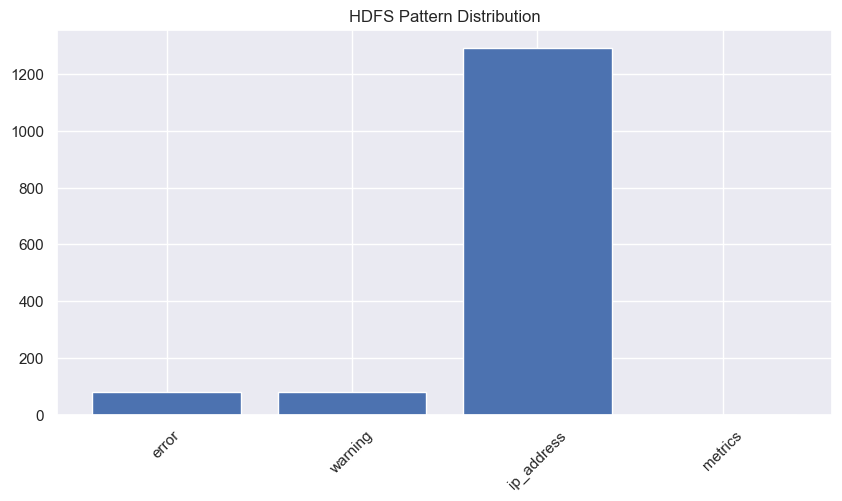

error: 80 (4.00%)
ip_address: 1291 (64.55%)
metrics: 0 (0.00%)

Apache Pattern Analysis:


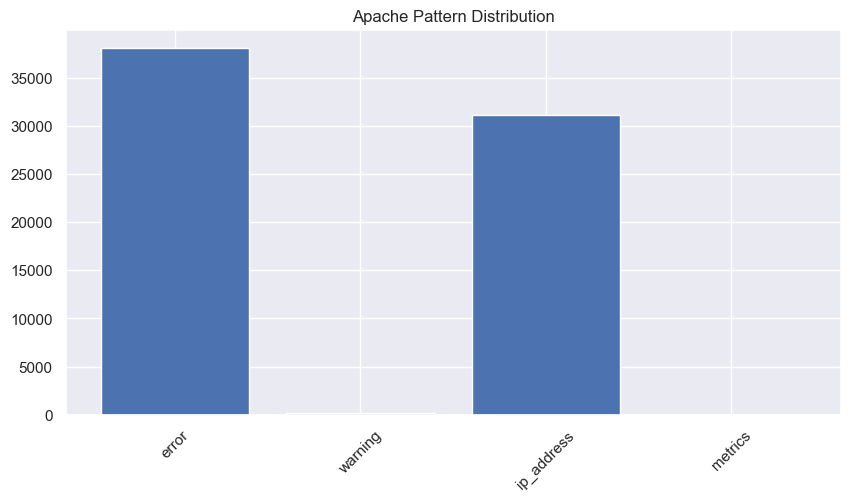

error: 38081 (67.42%)
ip_address: 31115 (55.09%)
metrics: 7 (0.01%)

HealthApp Pattern Analysis:


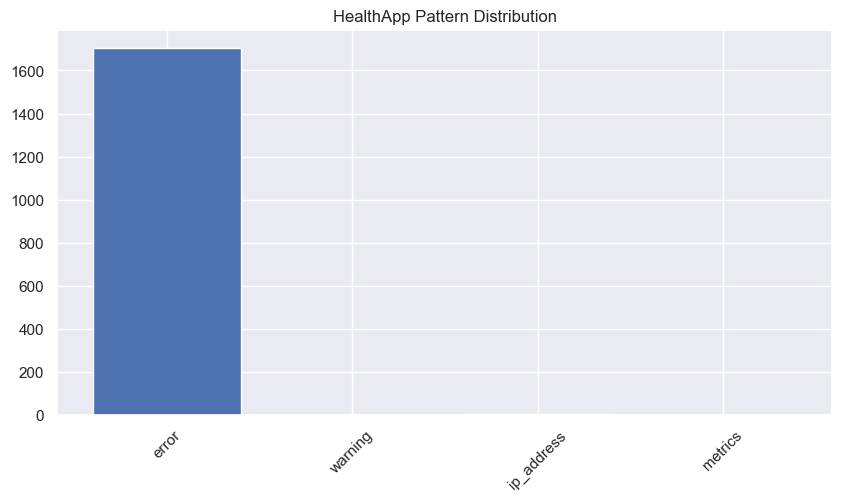

error: 1704 (0.67%)
ip_address: 5 (0.00%)
metrics: 0 (0.00%)


In [6]:
def analyze_patterns(logs, name):
    """Analyze common patterns in logs."""
    print(f"\n{name} Pattern Analysis:")
    
    # Common patterns to look for
    patterns = {
        'error': r'error|exception|fail|failed|failure',
        'warning': r'warn|warning|high|critical',
        'ip_address': r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b',
        'metrics': r'\d+%|\d+(?:\.\d+)?(?:GB|MB|KB|ms|sec)'
    }
    
    # Count pattern occurrences
    counts = {pattern: sum(1 for log in logs if re.search(regex, log, re.IGNORECASE))
             for pattern, regex in patterns.items()}
    
    # Plot pattern distribution
    plt.figure(figsize=(10, 5))
    plt.bar(counts.keys(), counts.values())
    plt.title(f"{name} Pattern Distribution")
    plt.xticks(rotation=45)
    plt.show()
    
    # Print percentages
    total = len(logs)
    for pattern, count in counts.items():
        print(f"{pattern}: {count} ({count/total*100:.2f}%)")

# Run pattern analysis
for name, logs in [("HDFS", hdfs_logs), ("Apache", apache_logs), ("HealthApp", health_logs)]:
    analyze_patterns(logs, name)

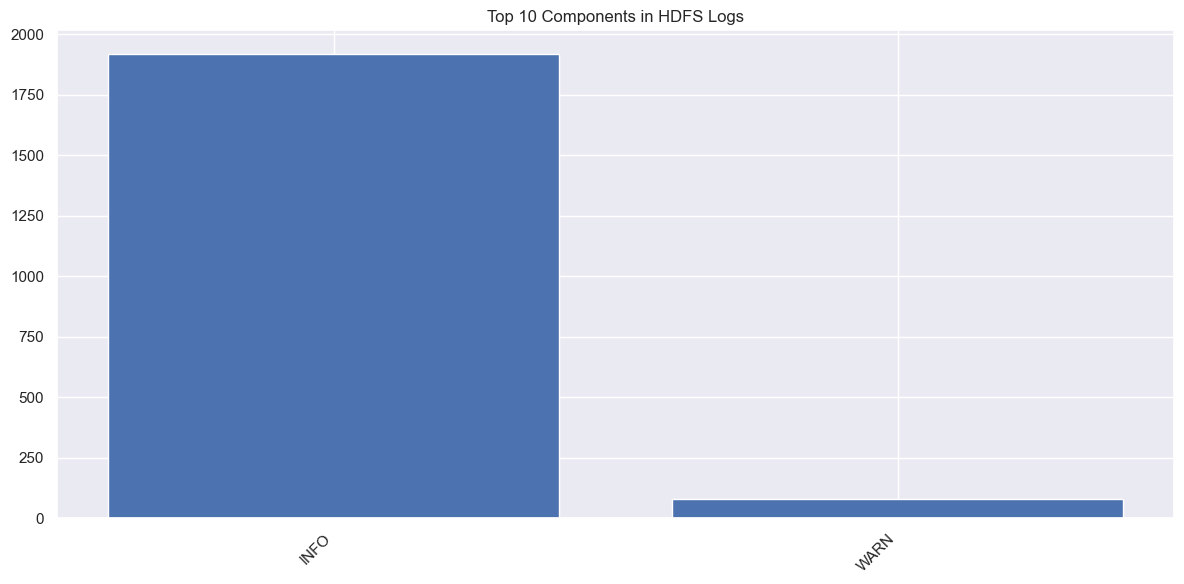

INFO: 1920 (96.00%)
WARN: 80 (4.00%)


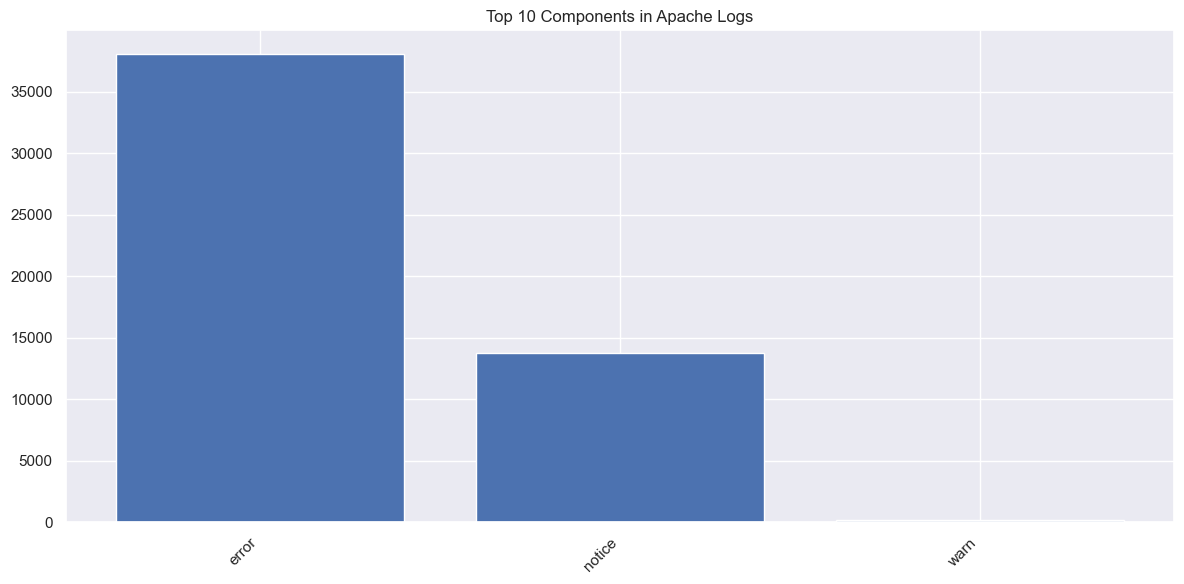

error: 38081 (73.23%)
notice: 13755 (26.45%)
warn: 168 (0.32%)


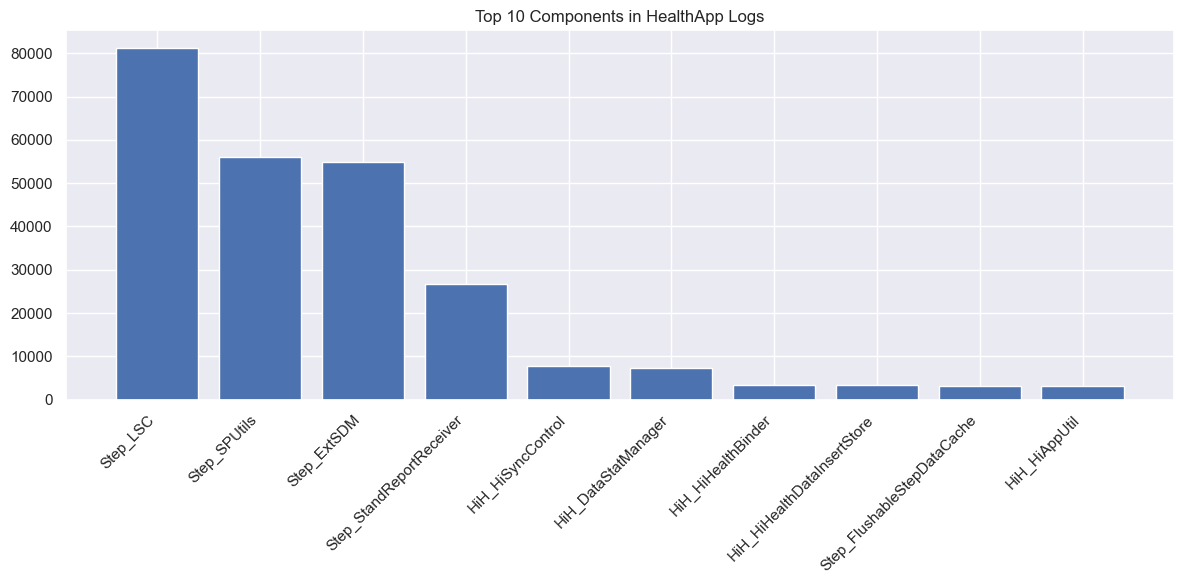

Step_LSC: 81216 (32.05%)
Step_SPUtils: 56057 (22.12%)
Step_ExtSDM: 54857 (21.65%)
Step_StandReportReceiver: 26815 (10.58%)
HiH_HiSyncControl: 7694 (3.04%)
HiH_DataStatManager: 7237 (2.86%)
HiH_HiHealthBinder: 3456 (1.36%)
HiH_HiHealthDataInsertStore: 3385 (1.34%)
Step_FlushableStepDataCache: 3231 (1.28%)
HiH_HiAppUtil: 3156 (1.25%)


In [7]:
def extract_components(logs, name):
    """Extract and analyze components from logs."""
    if name == "HDFS":
        components = [log.split(' ', 4)[3] if len(log.split(' ', 4)) >= 4 else None for log in logs]
    elif name == "Apache":
        components = [re.search(r'\[\w+\s+\w+\s+\d+\s+\d+:\d+:\d+\s+\d+\]\s+\[(\w+)\]', log).group(1) 
                     if re.search(r'\[\w+\s+\w+\s+\d+\s+\d+:\d+:\d+\s+\d+\]\s+\[(\w+)\]', log) else None 
                     for log in logs]
    else:  # HealthApp
        components = [log.split('|')[1] if len(log.split('|')) >= 2 else None for log in logs]
    
    # Remove None values
    components = [c for c in components if c]
    
    # Get top components
    from collections import Counter
    counts = Counter(components).most_common(10)
    
    # Plot
    labels, values = zip(*counts)
    plt.figure(figsize=(12, 6))
    plt.bar(labels, values)
    plt.title(f"Top 10 Components in {name} Logs")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print percentages
    total = len(components)
    for label, value in counts:
        print(f"{label}: {value} ({value/total*100:.2f}%)")

# Run component analysis
for name, logs in [("HDFS", hdfs_logs), ("Apache", apache_logs), ("HealthApp", health_logs)]:
    extract_components(logs, name)

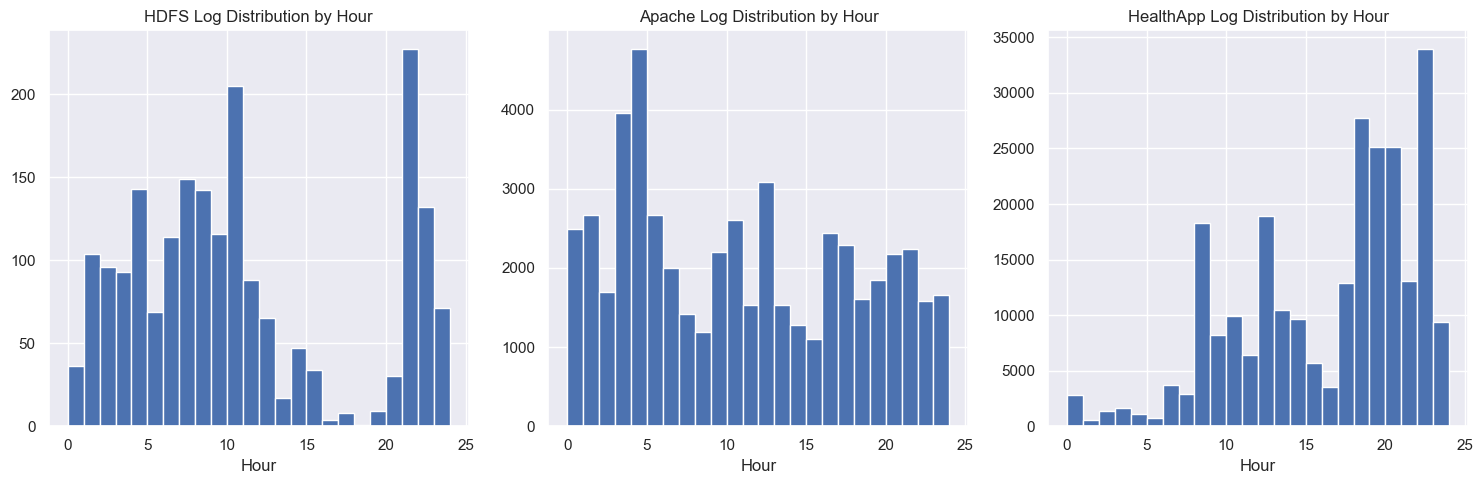

In [8]:
# Create timestamp lists
hdfs_timestamps = [parse_hdfs_timestamp(log) for log in hdfs_logs]
apache_timestamps = [parse_apache_timestamp(log) for log in apache_logs]
health_timestamps = [parse_health_timestamp(log) for log in health_logs]

# Remove None values
hdfs_timestamps = [ts for ts in hdfs_timestamps if ts is not None]
apache_timestamps = [ts for ts in apache_timestamps if ts is not None]
health_timestamps = [ts for ts in health_timestamps if ts is not None]

# Plot time distributions
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.hist([ts.hour for ts in hdfs_timestamps], bins=24, range=(0,24))
plt.title('HDFS Log Distribution by Hour')
plt.xlabel('Hour')

plt.subplot(132)
plt.hist([ts.hour for ts in apache_timestamps], bins=24, range=(0,24))
plt.title('Apache Log Distribution by Hour')
plt.xlabel('Hour')

plt.subplot(133)
plt.hist([ts.hour for ts in health_timestamps], bins=24, range=(0,24))
plt.title('HealthApp Log Distribution by Hour')
plt.xlabel('Hour')

plt.tight_layout()
plt.show()

In [9]:
# Function to parse logs into structured format
def parse_logs_to_df(logs, log_type):
    data = []
    
    if log_type == "HDFS":
        for log in logs:
            parts = log.split(" ", 4)
            if len(parts) >= 5:
                timestamp = parse_hdfs_timestamp(log)
                data.append({
                    'timestamp': timestamp,
                    'date': parts[0],
                    'time': parts[1],
                    'level': parts[2],
                    'component': parts[3],
                    'message': parts[4]
                })
    
    elif log_type == "Apache":
        for log in logs:
            timestamp_match = re.search(r'\[(.*?)\]', log)
            component_match = re.search(r'\]\s+\[(.*?)\]', log)
            if timestamp_match and component_match:
                timestamp = parse_apache_timestamp(log)
                message = log[log.find(']', log.find(']')+1)+2:]
                data.append({
                    'timestamp': timestamp,
                    'component': component_match.group(1),
                    'message': message
                })
    
    else:  # HealthApp
        for log in logs:
            parts = log.split('|')
            if len(parts) >= 3:
                timestamp = parse_health_timestamp(log)
                data.append({
                    'timestamp': timestamp,
                    'component': parts[1],
                    'level': parts[2],
                    'message': '|'.join(parts[3:])
                })
    
    return pd.DataFrame(data)

# Create DataFrames
hdfs_df = parse_logs_to_df(hdfs_logs, "HDFS")
apache_df = parse_logs_to_df(apache_logs, "Apache")
health_df = parse_logs_to_df(health_logs, "HealthApp")

# Display basic information about each DataFrame
for name, df in [("HDFS", hdfs_df), ("Apache", apache_df), ("HealthApp", health_df)]:
    print(f"\n{name} DataFrame Info:")
    print(df.info())
    print("\nSample data:")
    print(df.head())


HDFS DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  2000 non-null   datetime64[ns]
 1   date       2000 non-null   object        
 2   time       2000 non-null   object        
 3   level      2000 non-null   object        
 4   component  2000 non-null   object        
 5   message    2000 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 93.9+ KB
None

Sample data:
            timestamp    date    time level component  \
0 2008-11-09 20:36:15  081109  203615   148      INFO   
1 2008-11-09 20:38:07  081109  203807   222      INFO   
2 2008-11-09 20:40:05  081109  204005    35      INFO   
3 2008-11-09 20:40:15  081109  204015   308      INFO   
4 2008-11-09 20:41:06  081109  204106   329      INFO   

                                             message  
0  dfs.DataNode$Pac

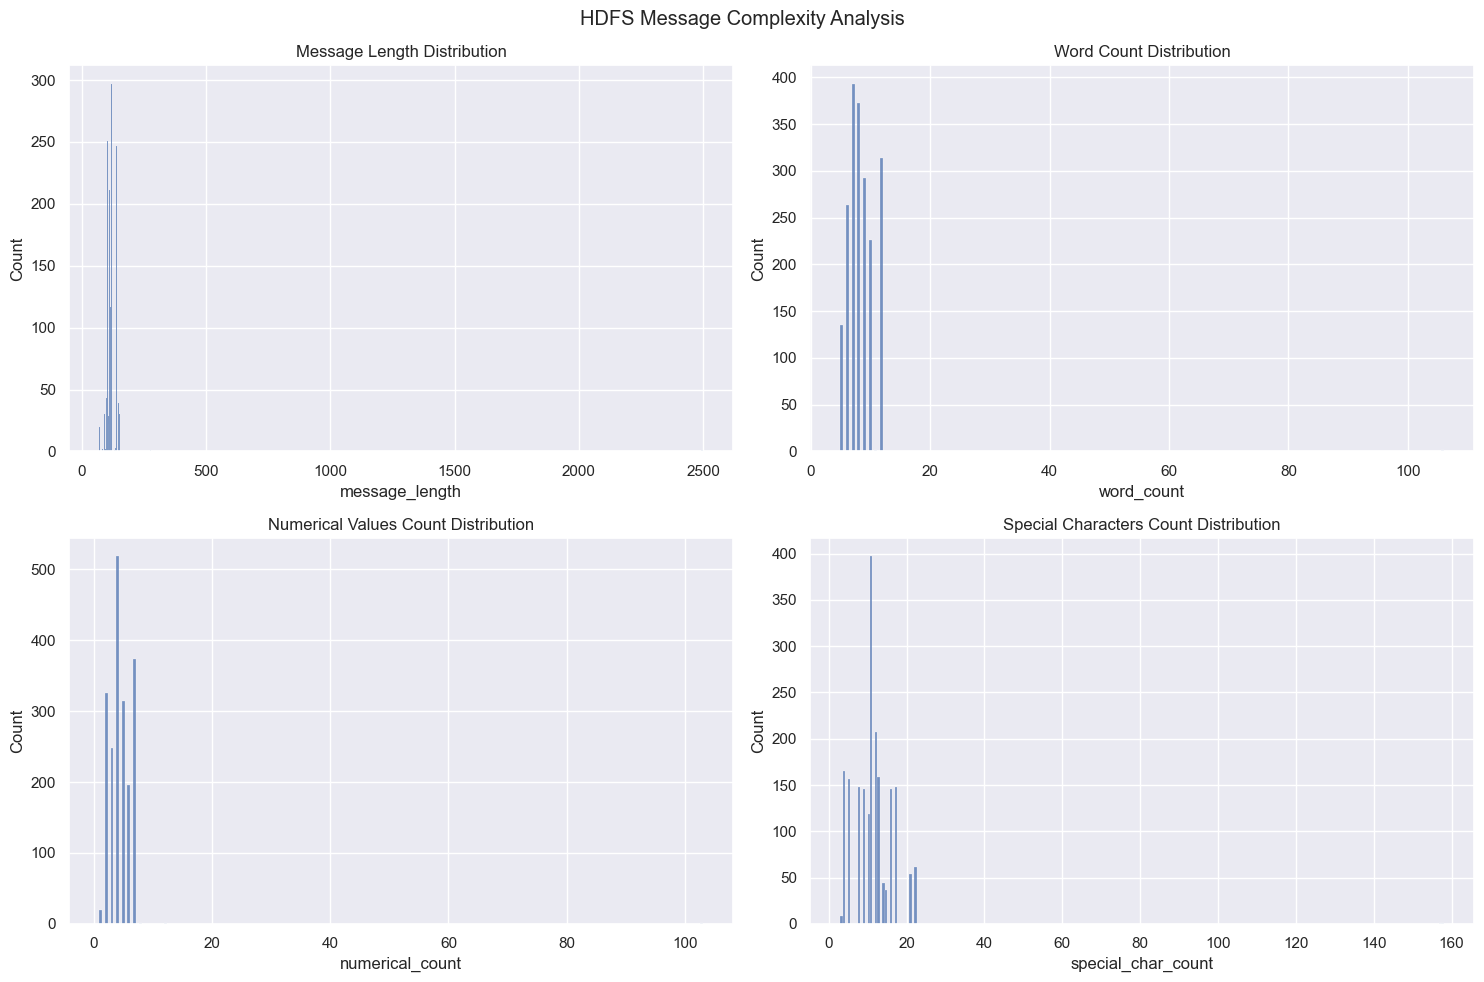

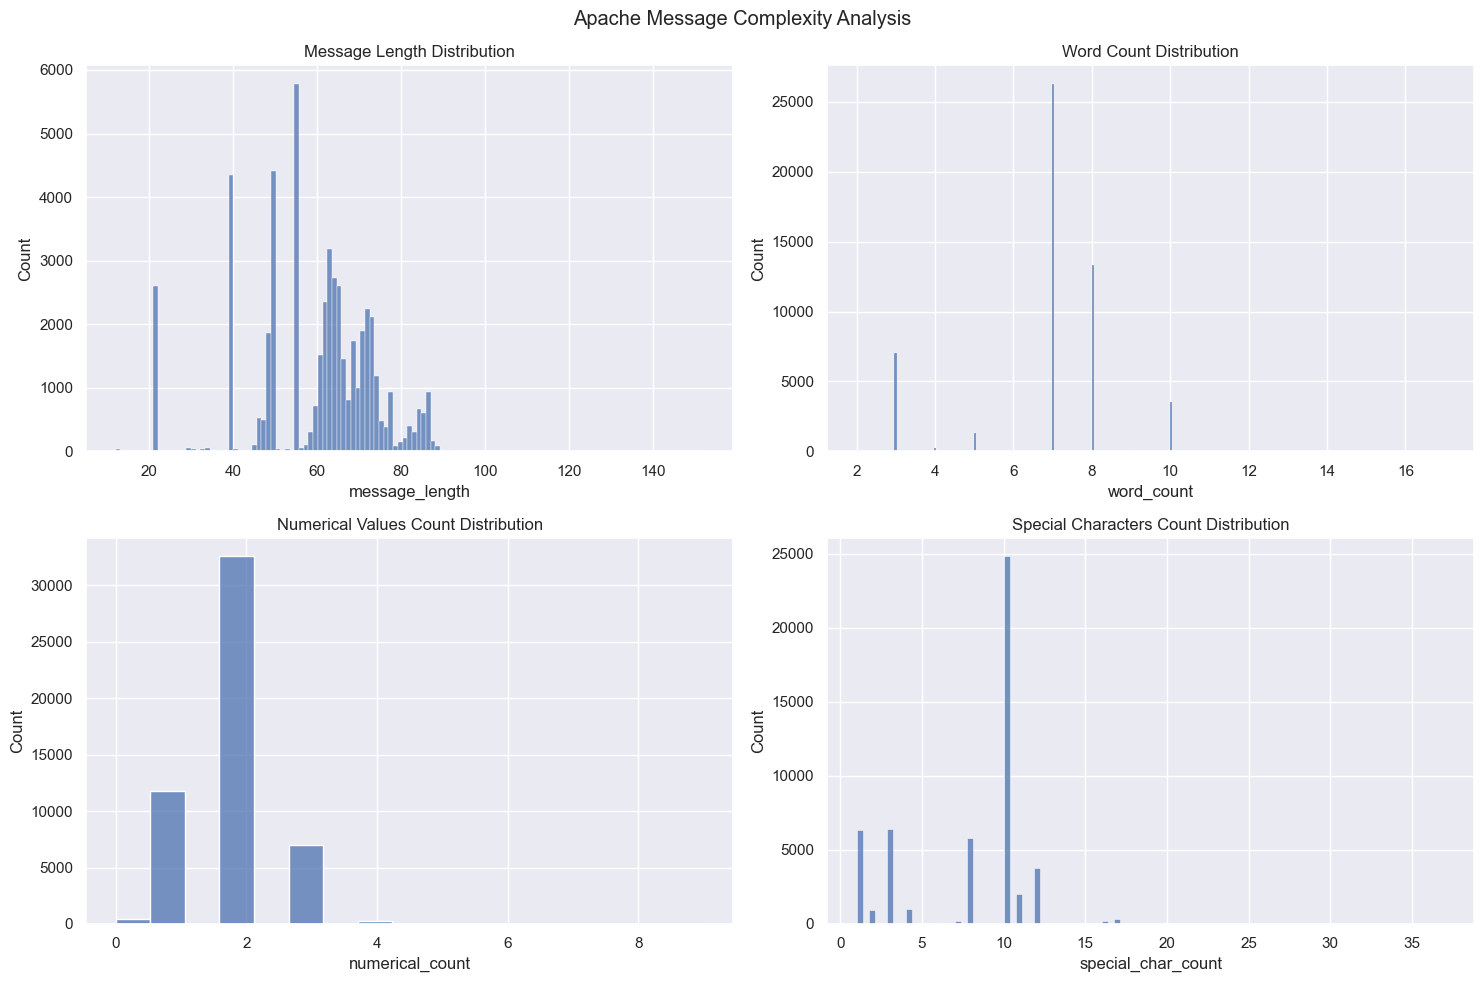

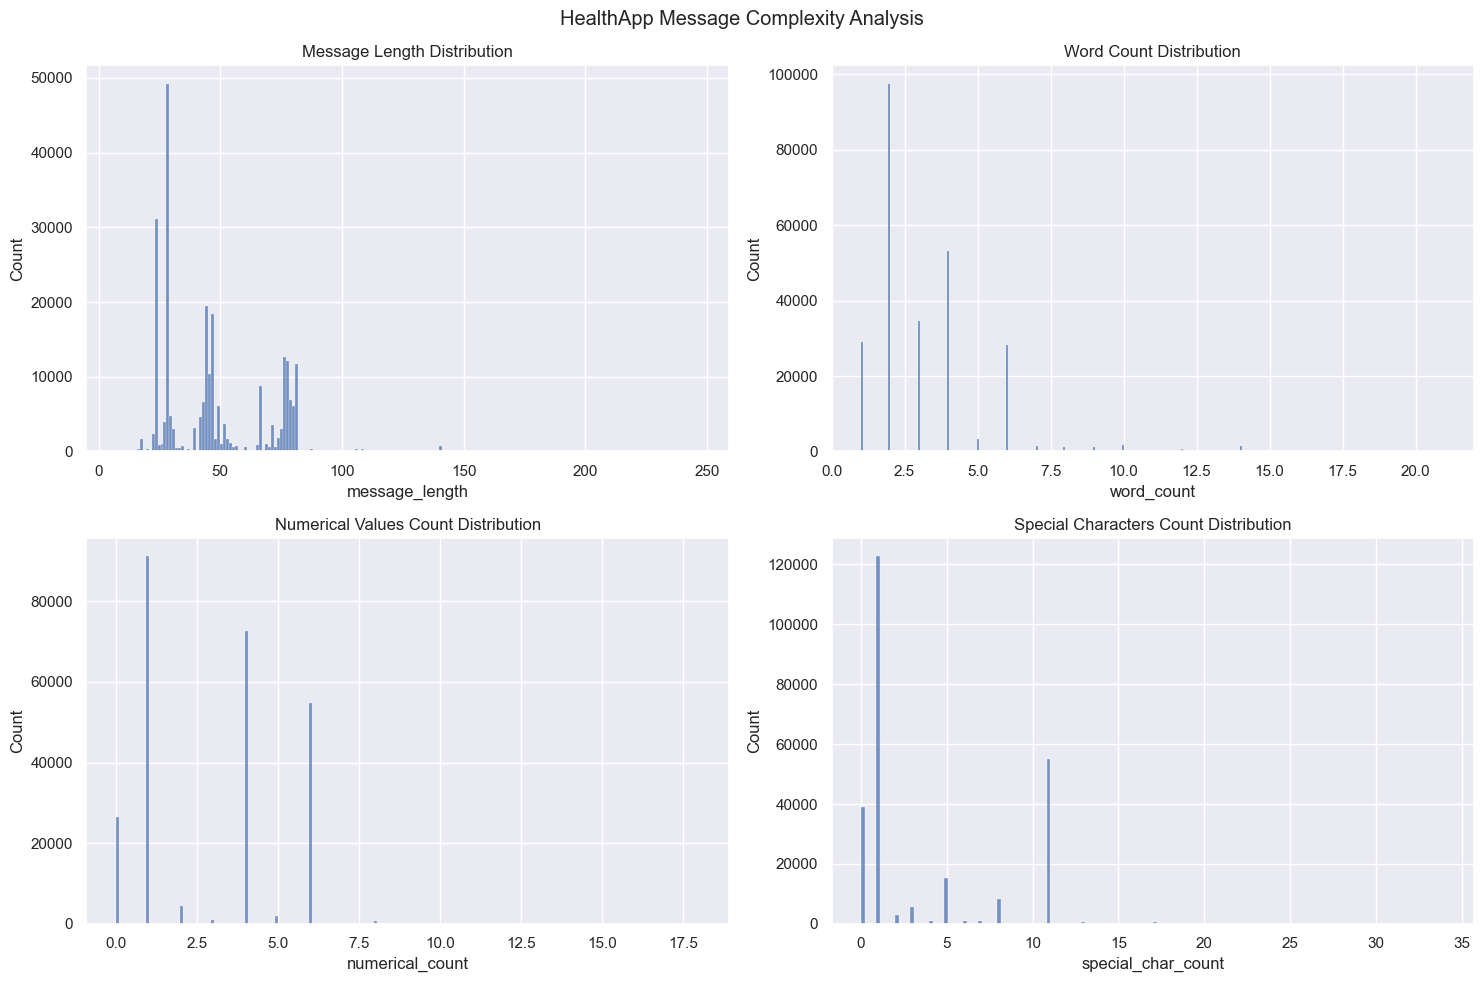

In [10]:
# Function to extract numerical values from messages
def extract_numerical_values(message):
    numbers = re.findall(r'\d+(?:\.\d+)?', message)
    return [float(num) for num in numbers]

# Function to analyze message complexity
def analyze_message_complexity(df, log_type):
    # Message length
    df['message_length'] = df['message'].str.len()
    
    # Number of words
    df['word_count'] = df['message'].str.split().str.len()
    
    # Number of numerical values
    df['numerical_count'] = df['message'].apply(lambda x: len(extract_numerical_values(x)))
    
    # Special characters count
    df['special_char_count'] = df['message'].str.count(r'[^a-zA-Z0-9\s]')
    
    # Plot distributions
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{log_type} Message Complexity Analysis')
    
    sns.histplot(data=df, x='message_length', ax=axes[0,0])
    axes[0,0].set_title('Message Length Distribution')
    
    sns.histplot(data=df, x='word_count', ax=axes[0,1])
    axes[0,1].set_title('Word Count Distribution')
    
    sns.histplot(data=df, x='numerical_count', ax=axes[1,0])
    axes[1,0].set_title('Numerical Values Count Distribution')
    
    sns.histplot(data=df, x='special_char_count', ax=axes[1,1])
    axes[1,1].set_title('Special Characters Count Distribution')
    
    plt.tight_layout()
    plt.show()
    
    return df

# Analyze complexity for each dataset
hdfs_df = analyze_message_complexity(hdfs_df, "HDFS")
apache_df = analyze_message_complexity(apache_df, "Apache")
health_df = analyze_message_complexity(health_df, "HealthApp")

/var/folders/dr/8_j4tm8j7_v5ymfll6_zyz4w0000gn/T/ipykernel_34467/2310802648.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  event_counts = df_temp.resample(freq).size()


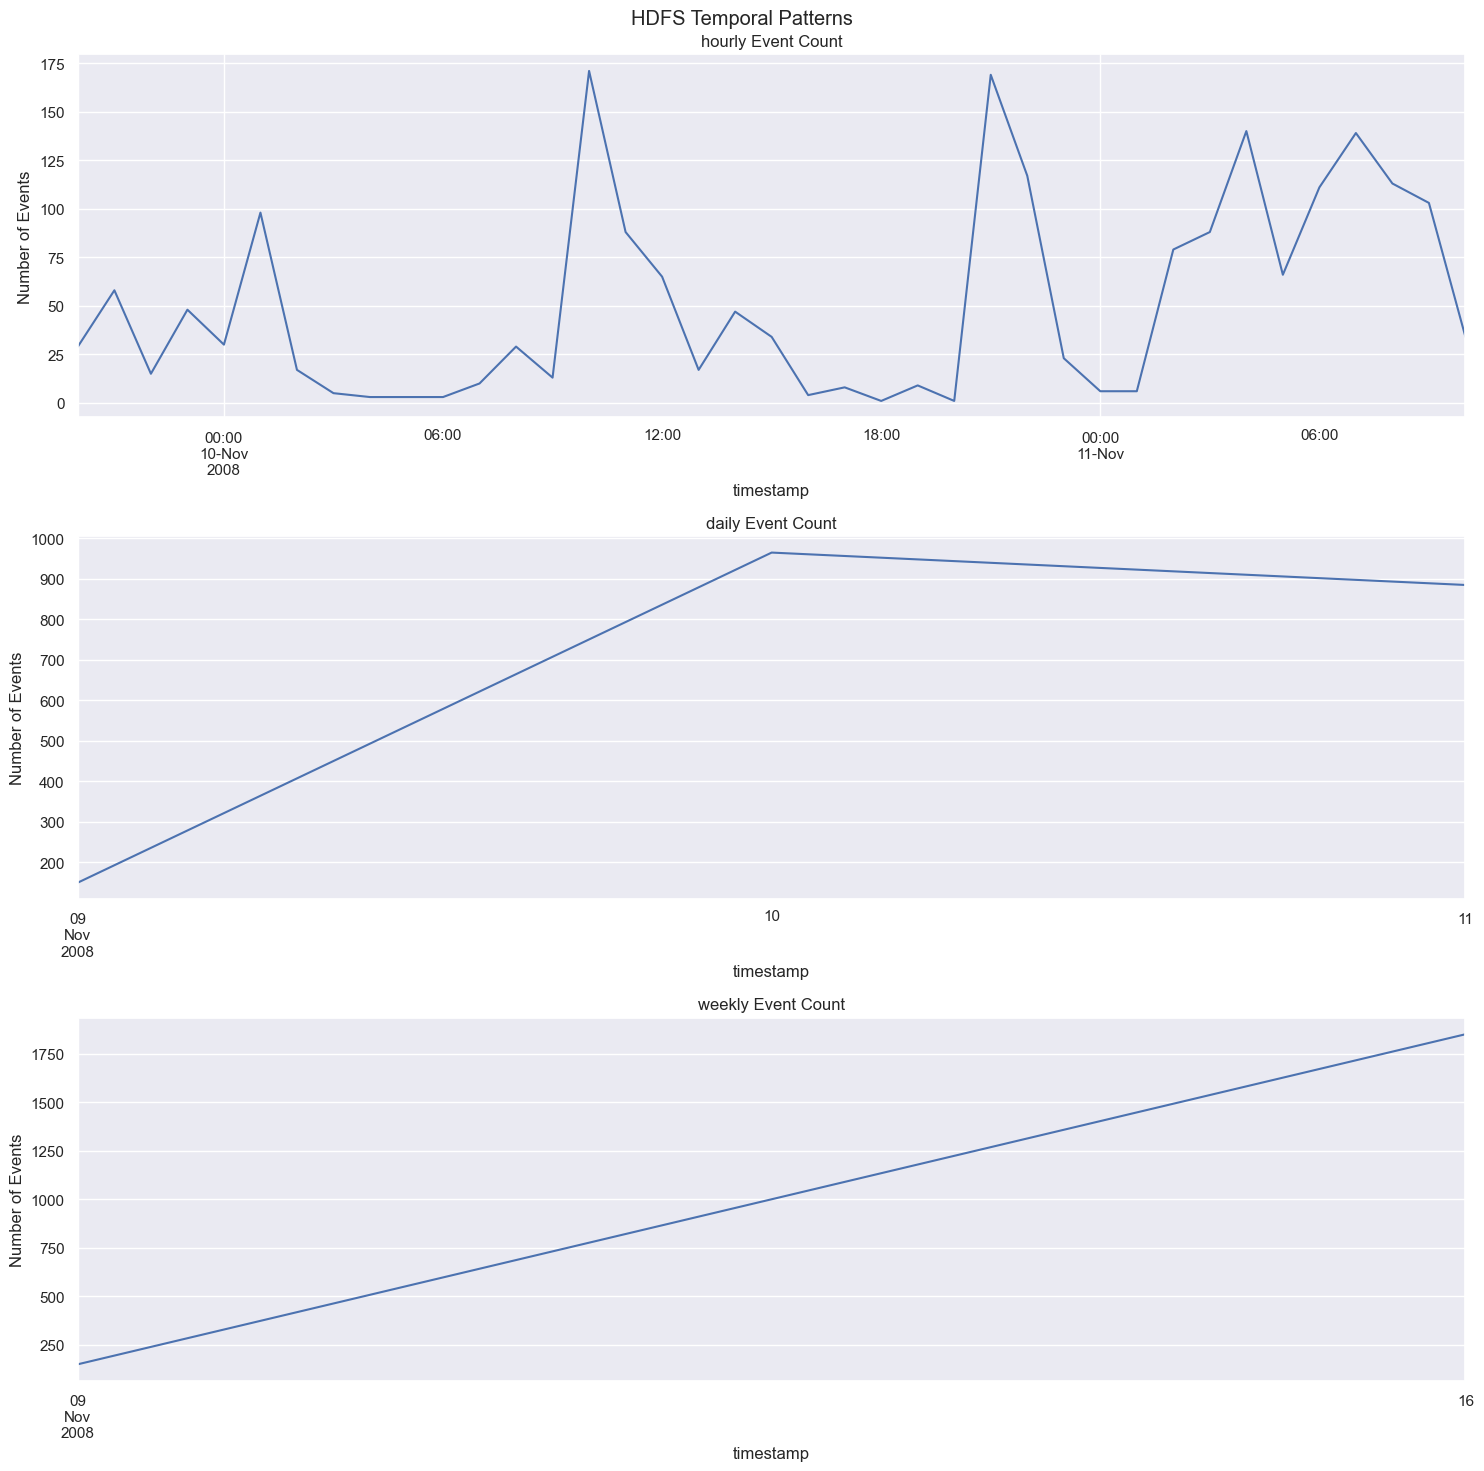

/var/folders/dr/8_j4tm8j7_v5ymfll6_zyz4w0000gn/T/ipykernel_34467/2310802648.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  event_counts = df_temp.resample(freq).size()


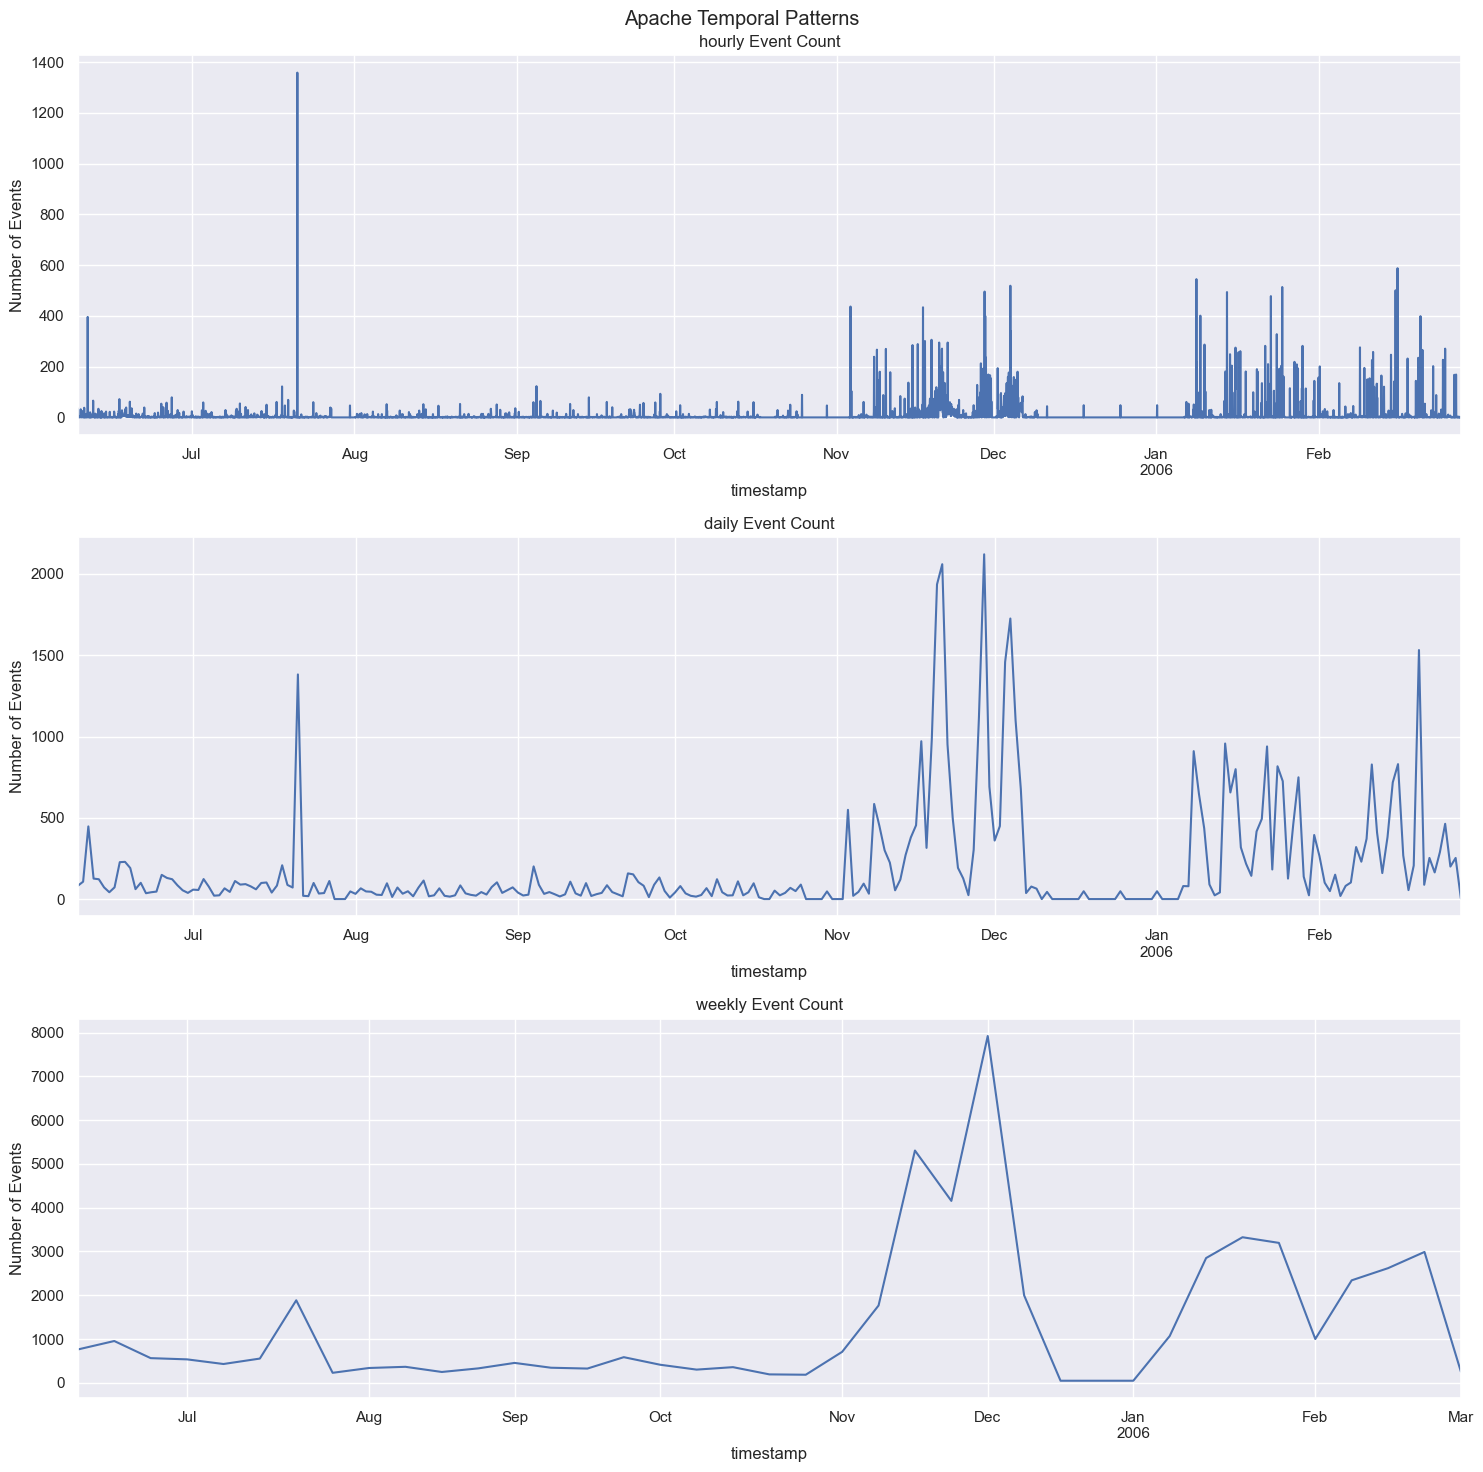

/var/folders/dr/8_j4tm8j7_v5ymfll6_zyz4w0000gn/T/ipykernel_34467/2310802648.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  event_counts = df_temp.resample(freq).size()


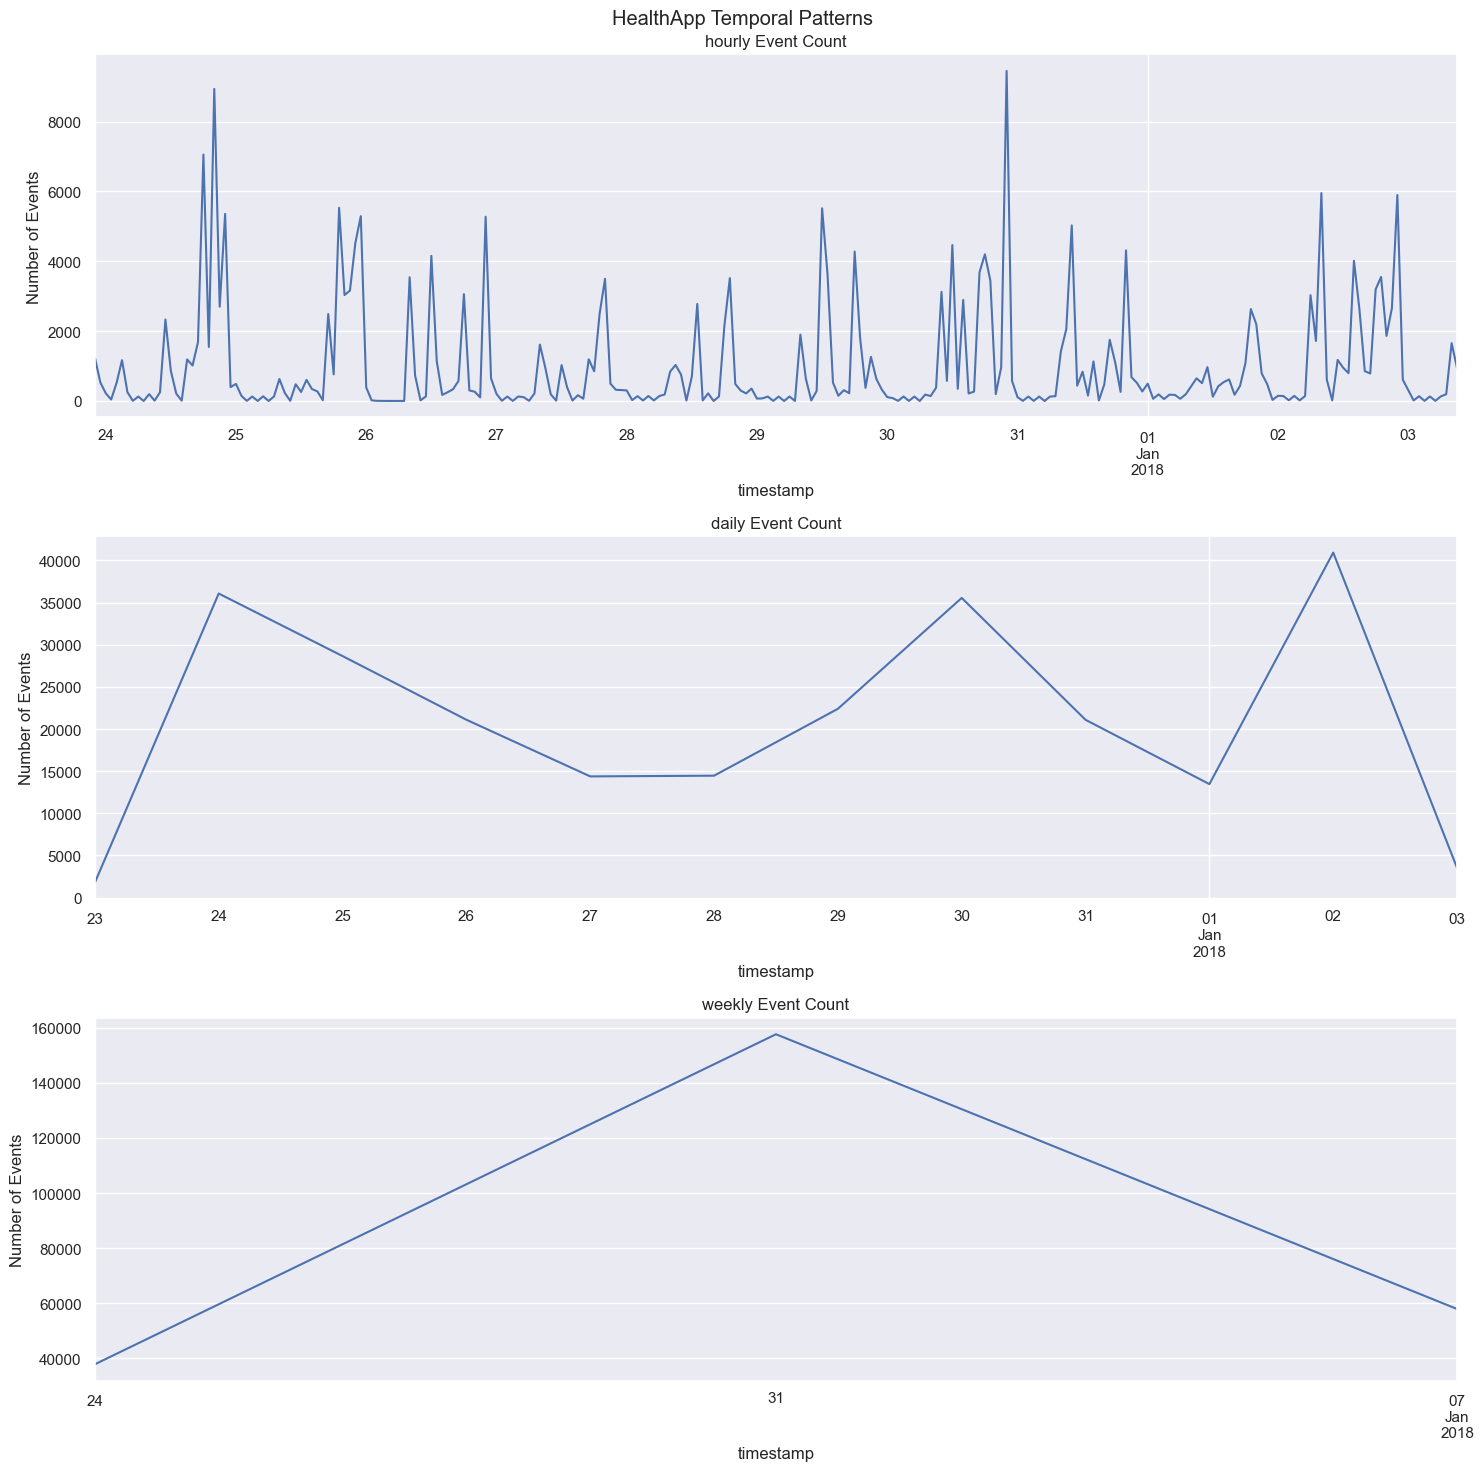

In [11]:
# Function to analyze temporal patterns
def analyze_temporal_patterns(df, log_type):
    # Set timestamp as index
    df_temp = df.copy()
    df_temp.set_index('timestamp', inplace=True)
    
    # Resample to different time windows
    windows = {
        'hourly': 'H',
        'daily': 'D',
        'weekly': 'W'
    }
    
    fig, axes = plt.subplots(len(windows), 1, figsize=(15, 5*len(windows)))
    fig.suptitle(f'{log_type} Temporal Patterns')
    
    for i, (window_name, freq) in enumerate(windows.items()):
        # Count events in each window
        event_counts = df_temp.resample(freq).size()
        
        # Plot
        event_counts.plot(ax=axes[i])
        axes[i].set_title(f'{window_name} Event Count')
        axes[i].set_ylabel('Number of Events')
    
    plt.tight_layout()
    plt.show()
    
    return df_temp

# Analyze temporal patterns for each dataset
hdfs_temporal = analyze_temporal_patterns(hdfs_df, "HDFS")
apache_temporal = analyze_temporal_patterns(apache_df, "Apache")
health_temporal = analyze_temporal_patterns(health_df, "HealthApp")

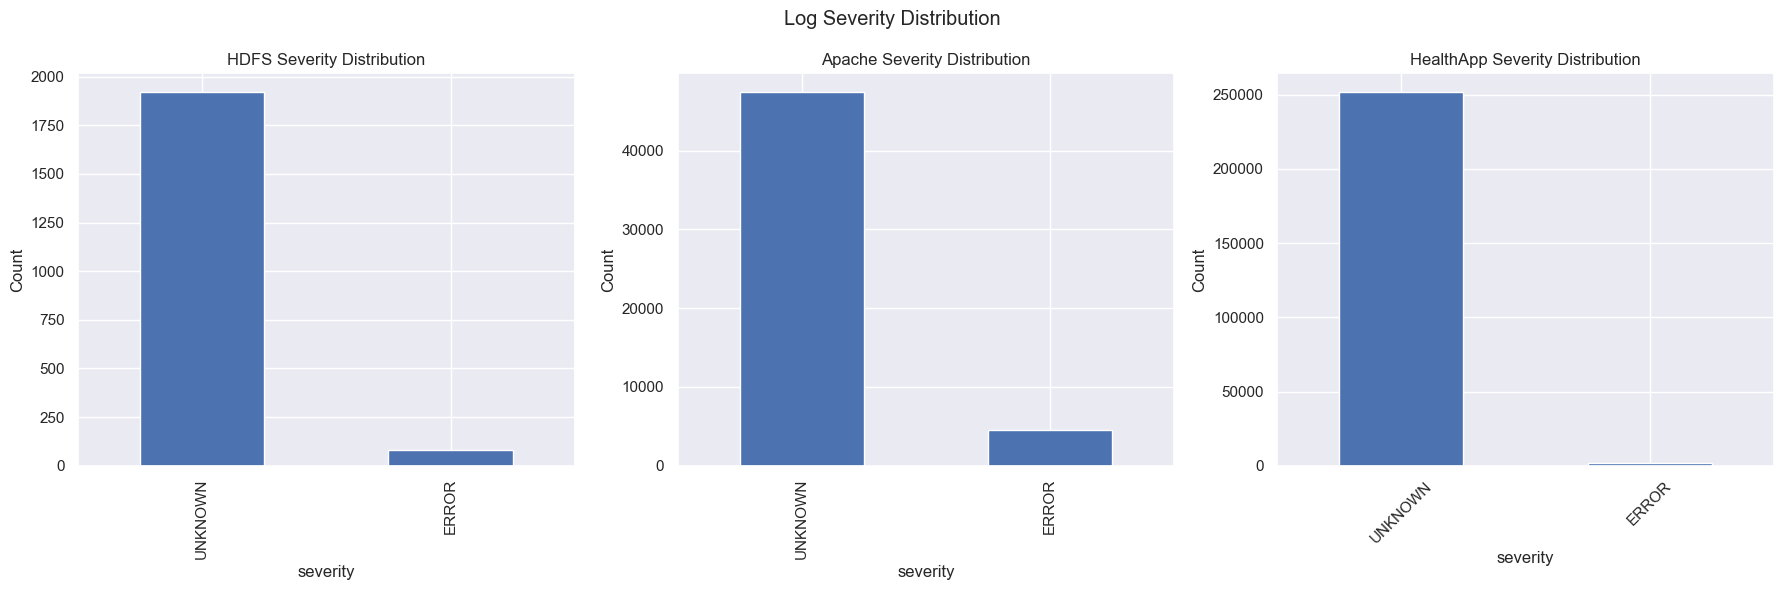

In [12]:
# Function to classify log severity
def classify_severity(row):
    message = row['message'].lower()
    level = row.get('level', '').lower()
    
    if any(word in message for word in ['error', 'fail', 'critical', 'exception']):
        return 'ERROR'
    elif any(word in message for word in ['warn', 'warning']):
        return 'WARNING'
    elif level in ['info', 'information']:
        return 'INFO'
    else:
        return 'UNKNOWN'

# Add severity classification
for df in [hdfs_df, apache_df, health_df]:
    df['severity'] = df.apply(classify_severity, axis=1)

# Plot severity distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Log Severity Distribution')

for i, (name, df) in enumerate([("HDFS", hdfs_df), ("Apache", apache_df), ("HealthApp", health_df)]):
    severity_counts = df['severity'].value_counts()
    severity_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{name} Severity Distribution')
    axes[i].set_ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

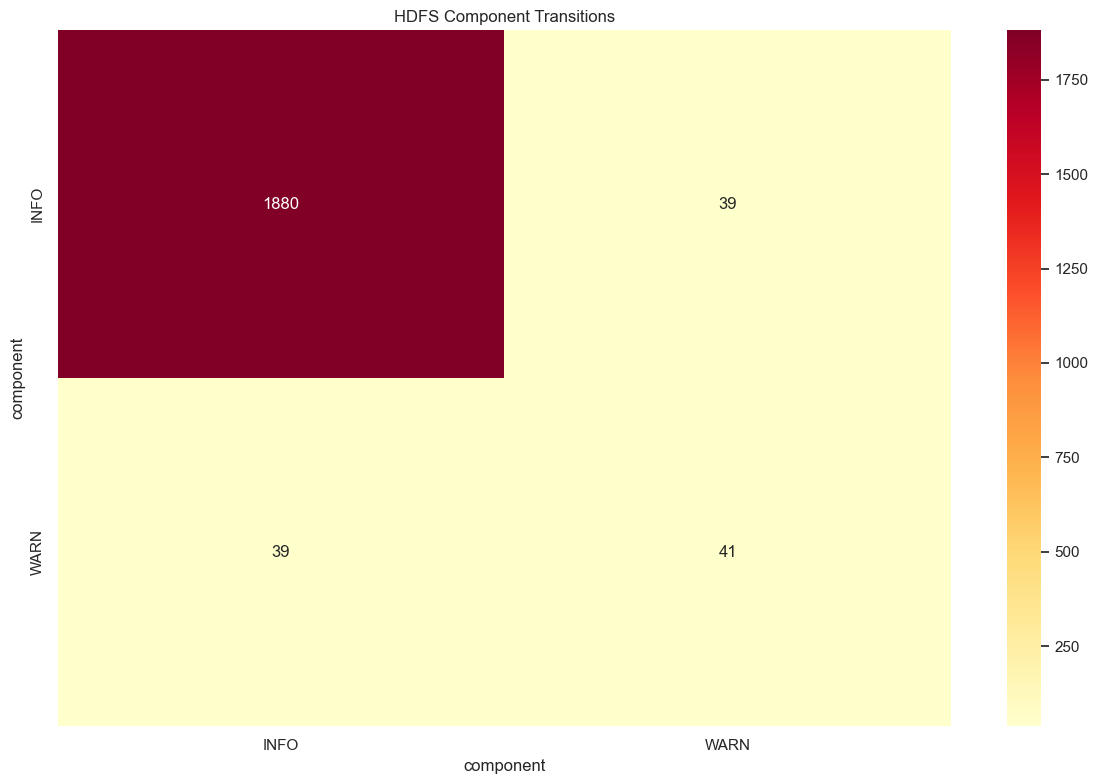

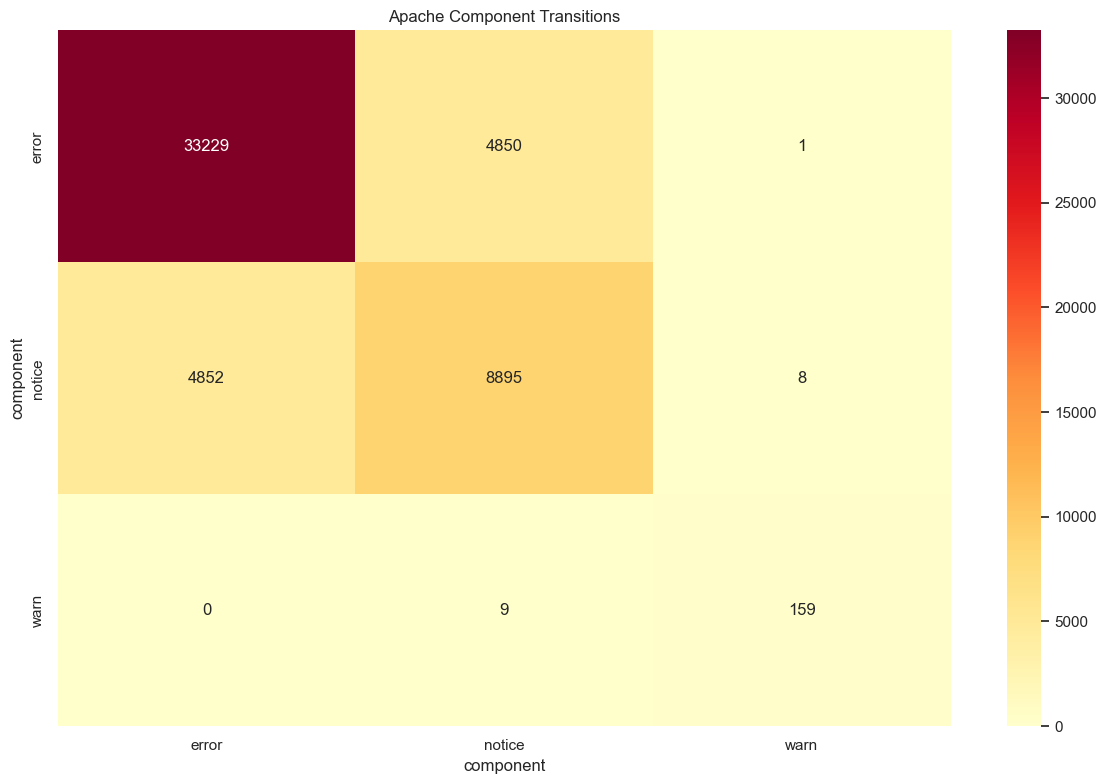

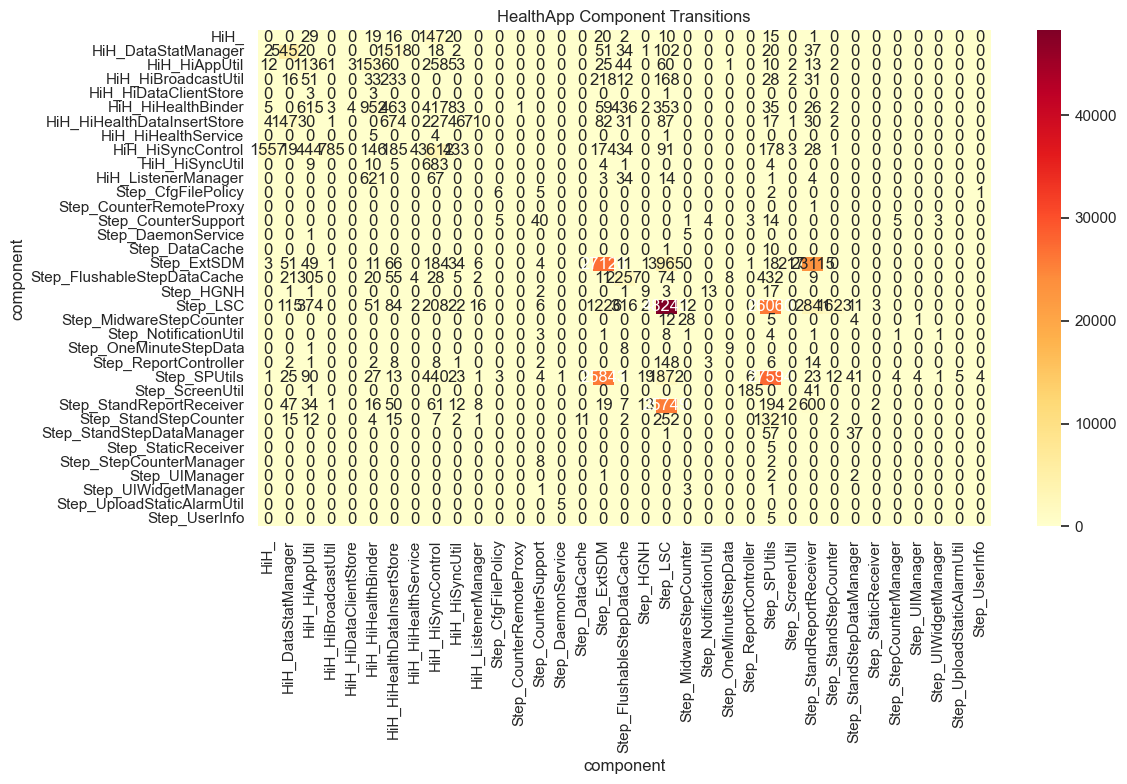

In [13]:
# Function to analyze component transitions
def analyze_component_transitions(df, log_type):
    # Create transition matrix
    transitions = pd.crosstab(df['component'].shift(), df['component'])
    
    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(transitions, cmap='YlOrRd', annot=True, fmt='d')
    plt.title(f'{log_type} Component Transitions')
    plt.tight_layout()
    plt.show()
    
    return transitions

# Analyze transitions for each dataset
hdfs_transitions = analyze_component_transitions(hdfs_df, "HDFS")
apache_transitions = analyze_component_transitions(apache_df, "Apache")
health_transitions = analyze_component_transitions(health_df, "HealthApp")

HDFS DataFrame columns: ['timestamp', 'date', 'time', 'level', 'component', 'message', 'message_length', 'word_count', 'numerical_count', 'special_char_count', 'severity']

Apache DataFrame columns: ['timestamp', 'component', 'message', 'message_length', 'word_count', 'numerical_count', 'special_char_count', 'severity']

HealthApp DataFrame columns: ['timestamp', 'component', 'level', 'message', 'message_length', 'word_count', 'numerical_count', 'special_char_count', 'severity']

Successfully created HDFS features
Successfully created Apache features


/var/folders/dr/8_j4tm8j7_v5ymfll6_zyz4w0000gn/T/ipykernel_34467/372950299.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_features = df_features.fillna(method='ffill')
/var/folders/dr/8_j4tm8j7_v5ymfll6_zyz4w0000gn/T/ipykernel_34467/372950299.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_features = df_features.fillna(method='ffill')
/var/folders/dr/8_j4tm8j7_v5ymfll6_zyz4w0000gn/T/ipykernel_34467/372950299.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_features = df_features.fillna(method='ffill')


Successfully created HealthApp features

Plotting features for HDFS


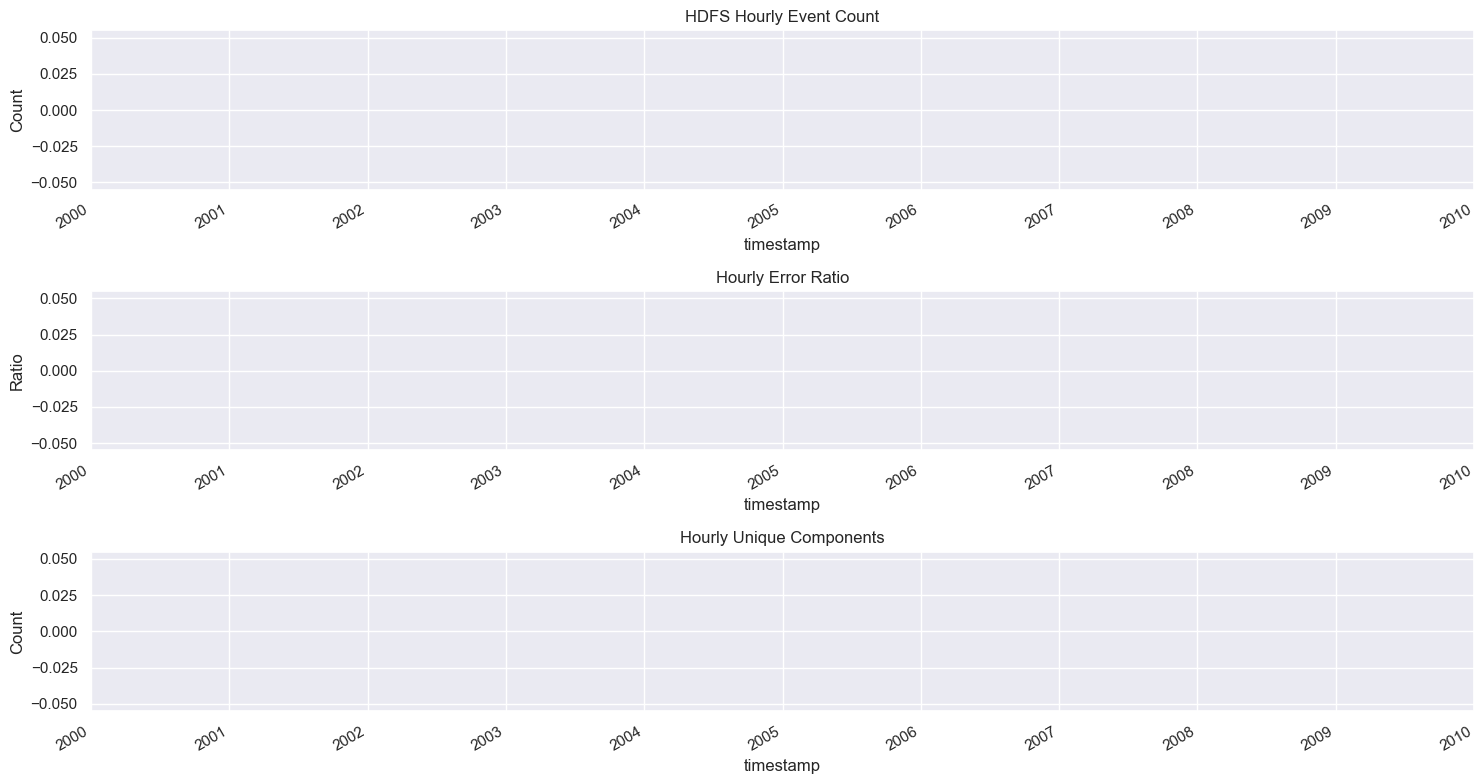

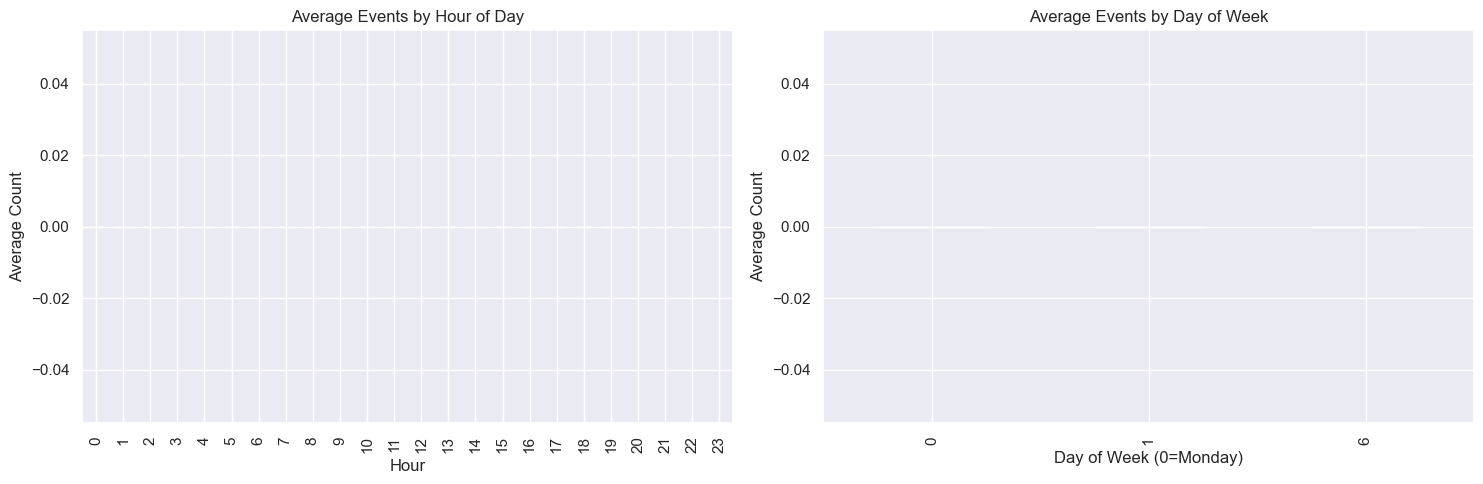


Plotting features for Apache


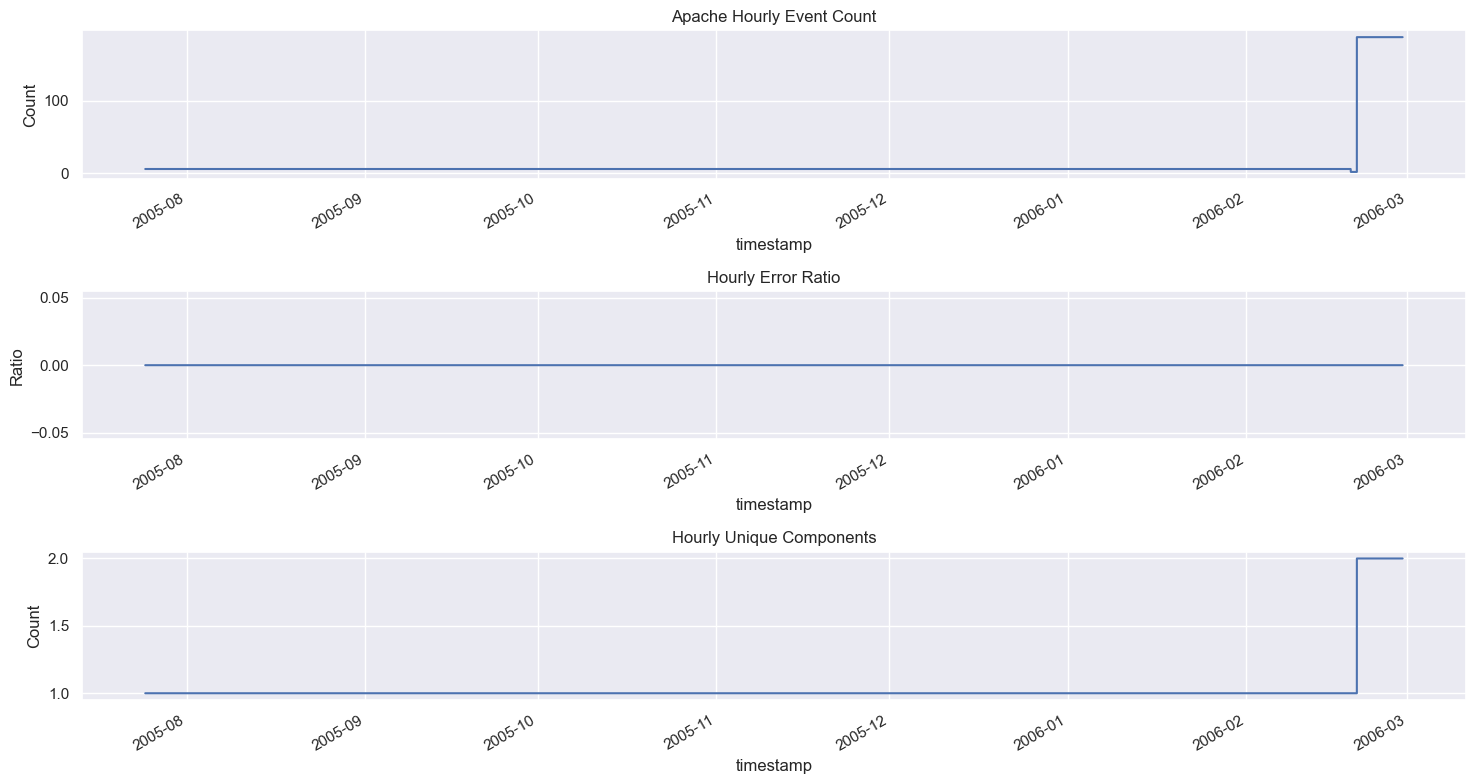

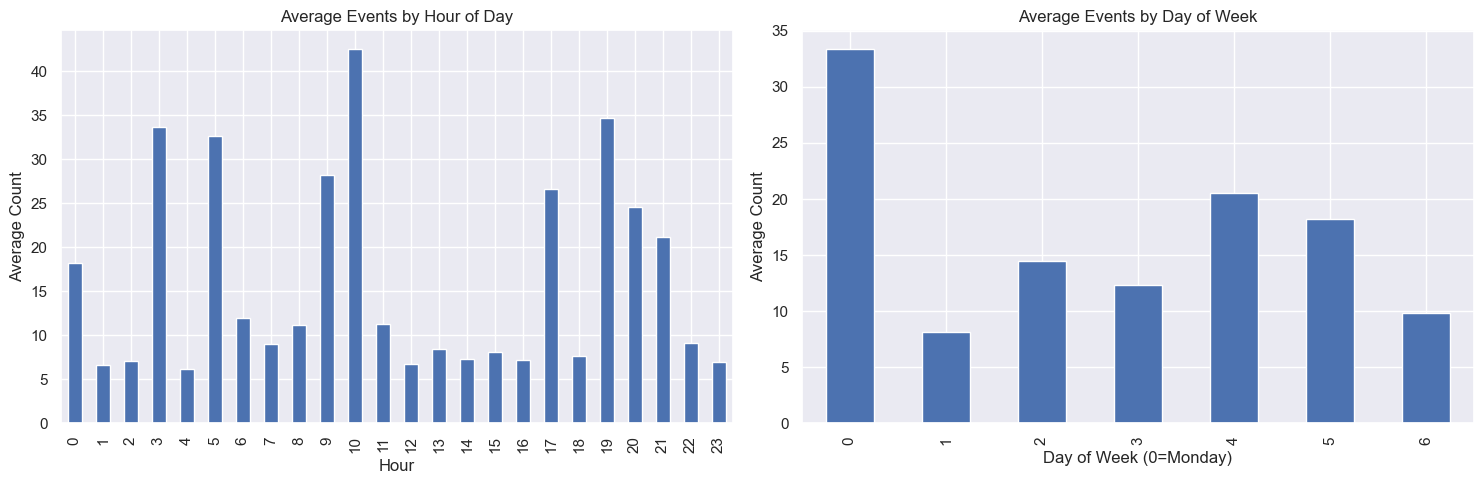


Plotting features for HealthApp


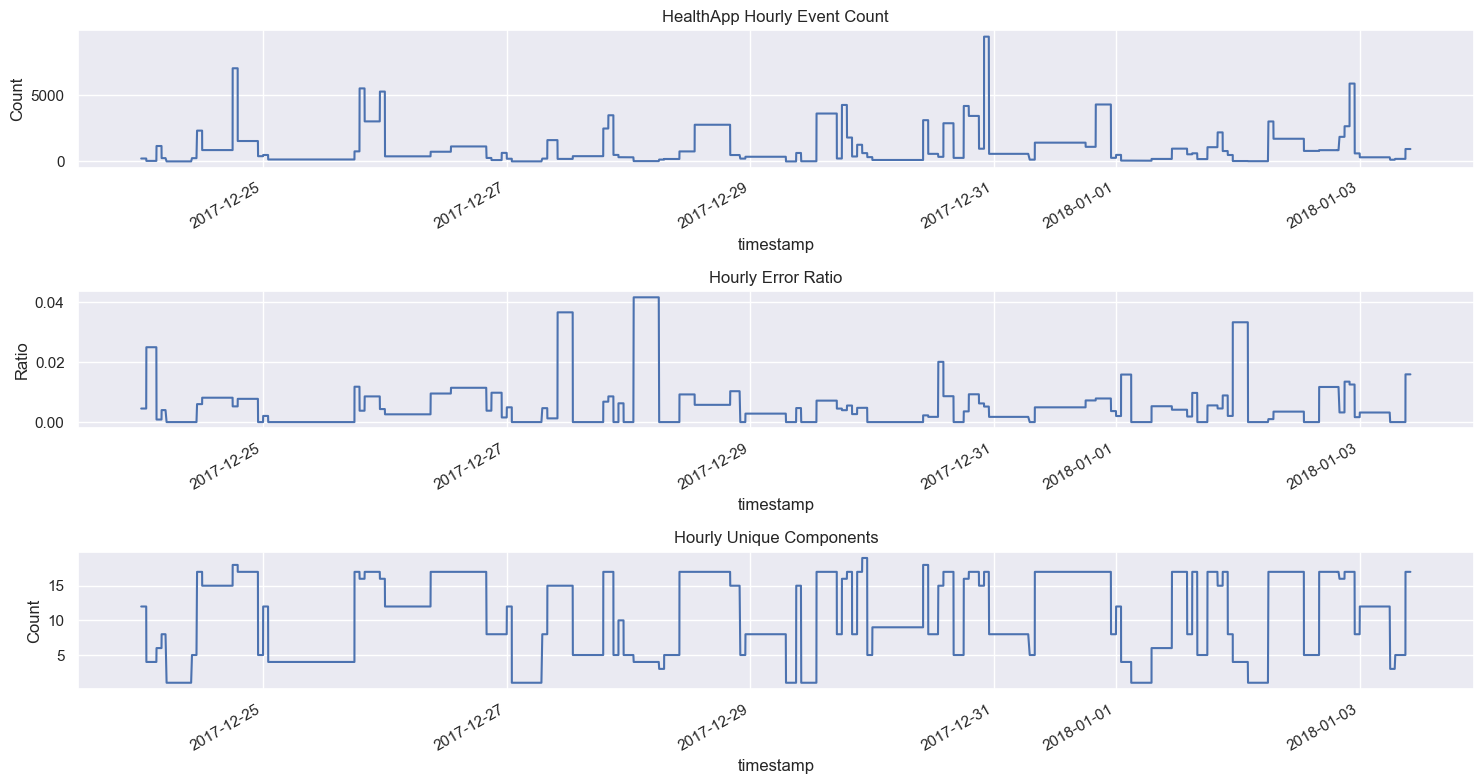

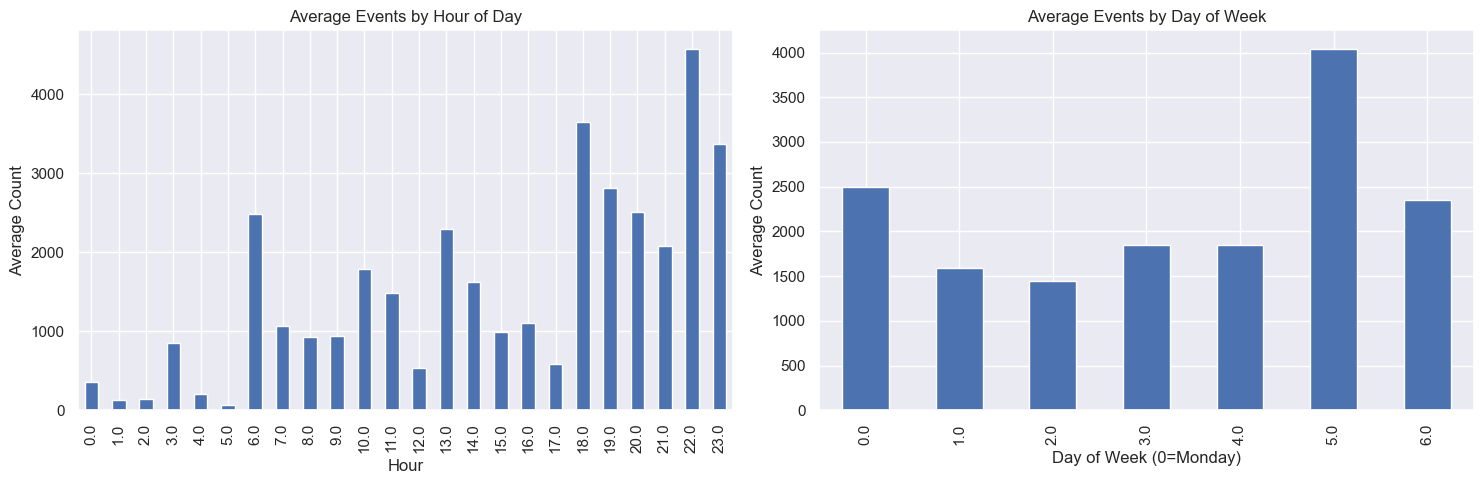


HDFS Features Summary:

Numerical columns statistics:
       message_length   word_count  numerical_count  special_char_count  \
count     2000.000000  2000.000000      2000.000000         2000.000000   
mean       118.504000     8.442500         4.539500           11.457000   
std         77.208462     3.726746         3.557776            6.426803   
min         71.000000     5.000000         1.000000            3.000000   
25%        105.000000     7.000000         3.000000            9.000000   
50%        116.000000     8.000000         4.000000           11.000000   
75%        122.000000    10.000000         6.000000           13.000000   
max       2498.000000   106.000000       103.000000          158.000000   

       event_count_1h  error_ratio_1h  unique_components_1h  event_count_6h  \
count             0.0             0.0                   0.0             0.0   
mean              NaN             NaN                   NaN             NaN   
std               NaN           

In [16]:
# Function to create time-window features
def create_time_features(df, window_sizes=['1h', '6h', '24h']):
    df_features = df.copy()
    
    # Make sure timestamp is datetime type and set as index
    if 'timestamp' in df_features.columns:
        df_features['timestamp'] = pd.to_datetime(df_features['timestamp'])
        df_features.set_index('timestamp', inplace=True)
    
    for window in window_sizes:
        # Event count in window
        df_features[f'event_count_{window}'] = df_features.groupby(
            pd.Grouper(freq=window)).size()
        
        # Error ratio in window
        if 'severity' in df_features.columns:
            error_counts = (df_features['severity'] == 'ERROR').groupby(
                pd.Grouper(freq=window)).sum()
            total_counts = df_features.groupby(pd.Grouper(freq=window)).size()
            df_features[f'error_ratio_{window}'] = error_counts / total_counts
        
        # Unique components in window
        if 'component' in df_features.columns:
            df_features[f'unique_components_{window}'] = df_features.groupby(
                pd.Grouper(freq=window))['component'].nunique()
    
    # Add basic time features
    df_features['hour'] = df_features.index.hour
    df_features['day'] = df_features.index.day
    df_features['day_of_week'] = df_features.index.dayofweek
    df_features['is_weekend'] = df_features['day_of_week'].isin([5, 6]).astype(int)
    
    # Forward fill any NaN values that might have been created
    df_features = df_features.fillna(method='ffill')
    
    return df_features

# Let's first check what columns we have in each DataFrame
print("HDFS DataFrame columns:", hdfs_df.columns.tolist())
print("\nApache DataFrame columns:", apache_df.columns.tolist())
print("\nHealthApp DataFrame columns:", health_df.columns.tolist())

# Create time-window features for each dataset
try:
    hdfs_features = create_time_features(hdfs_df)
    print("\nSuccessfully created HDFS features")
except Exception as e:
    print("\nError creating HDFS features:", str(e))

try:
    apache_features = create_time_features(apache_df)
    print("Successfully created Apache features")
except Exception as e:
    print("Error creating Apache features:", str(e))

try:
    health_features = create_time_features(health_df)
    print("Successfully created HealthApp features")
except Exception as e:
    print("Error creating HealthApp features:", str(e))

# Function to plot features if they were created successfully
def plot_time_features(df, name):
    plt.figure(figsize=(15, 8))
    
    # Plot event counts if available
    if 'event_count_1h' in df.columns:
        plt.subplot(311)
        df['event_count_1h'].plot()
        plt.title(f'{name} Hourly Event Count')
        plt.ylabel('Count')
    
    # Plot error ratio if available
    if 'error_ratio_1h' in df.columns:
        plt.subplot(312)
        df['error_ratio_1h'].plot()
        plt.title('Hourly Error Ratio')
        plt.ylabel('Ratio')
    
    # Plot unique components if available
    if 'unique_components_1h' in df.columns:
        plt.subplot(313)
        df['unique_components_1h'].plot()
        plt.title('Hourly Unique Components')
        plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    
    # Daily patterns
    if 'hour' in df.columns:
        plt.figure(figsize=(15, 5))
        
        plt.subplot(121)
        df.groupby('hour')['event_count_1h'].mean().plot(kind='bar')
        plt.title('Average Events by Hour of Day')
        plt.xlabel('Hour')
        plt.ylabel('Average Count')
        
        plt.subplot(122)
        df.groupby('day_of_week')['event_count_1h'].mean().plot(kind='bar')
        plt.title('Average Events by Day of Week')
        plt.xlabel('Day of Week (0=Monday)')
        plt.ylabel('Average Count')
        
        plt.tight_layout()
        plt.show()

# Try to plot features for each dataset that was successfully created
for name, df in [("HDFS", hdfs_features), ("Apache", apache_features), ("HealthApp", health_features)]:
    try:
        print(f"\nPlotting features for {name}")
        plot_time_features(df, name)
    except Exception as e:
        print(f"Error plotting {name} features:", str(e))

# Display summary statistics for successfully created features
for name, df in [("HDFS", hdfs_features), ("Apache", apache_features), ("HealthApp", health_features)]:
    try:
        print(f"\n{name} Features Summary:")
        print("\nNumerical columns statistics:")
        print(df.select_dtypes(include=[np.number]).describe())
    except Exception as e:
        print(f"Error displaying {name} summary:", str(e))